# Machine Learning Project 2: Pulsar Classification via Machine Learning using the HTRU2 Dataset


**Hoa Dinh, Jose Pablo Linarés Fernández, and Benedict Castro**\
Erasmus Mundus Joint Master Degree in Nuclear Physics\
Université de Caen Normandie

Date: **Feb 20, 2020**

## <center>ABSTRACT</center>

<div style="text-align: justify"> We have implemented a classification scheme to identify pulsar stars from the available data set of possible pulsar candidates collected during the High Time Resolution Universe Survey (HTRU2). Machine learning models, particularly logistic regression, neural network, decision tree, and random forest were used to build classifiers that could filter real pulsars from the candidates. An analysis of the distribution of data was also performed to give insights in the development of the models. The cross-validation resampling technique was also utilized to avoid unnecessary unbalanced effects in model building and prediction evaluation. For the interpretation of the results, confusion matrices and classification repots were employed. All the models implemented result in almost the same accuracies with differences in the order of only $10^{-3}$. Out of them, logistic regression was found out to be the one best suited in the detection of pulsars. </div>

## 1. INTRODUCTION

### 1.1 Pulsars

<div style="text-align: justify"> Pulsar classification can be one of the best training grounds for performing machine learning in astrophysics. These pulsars are said to be "pulsating radio sources", which have now been identified to be caused by rapidly rotating highly magnetized neutron stars and are detectable here on Earth [1]. One of the characteristic properties of these pulsars is that they exhibit periodic bursts of emission produced by their radio emitting jets. The direction of their emission also rotates with them and sweep the sky like a lighthouse. This gives astronomers information about the phenomenon as they observe a pulse of radio emission each time one of the jets points towards the Earth (see figure below) [2]. </div>

<img src="pulsar_vis.gif" align="center"/>

<center>Figure 1. Pulsar animation [3]</center>

<div style="text-align: justify"> The study and detection of pulsars provide a wealth of information about the physics of neutron stars [1]. They are also used as probes of stellar evolution. In addition, they are being used to test or verify some concepts in general relativity due to their extremely high densities. These allowed them to be good observables in detecting and mapping gravitational wave signatures. One problem, however, is that they are very difficult to identify in the large stream of data from radio telescopes. Moreover, a lot of man-made sources of radio frequency interference are also present, which can produce the same signals as pulsars. Hence, the classification of pulsars from possible candidate data is of great importance. </div>

### 1.2 Classification of Pulsars

<div style="text-align: justify"> In reality, pulsars are very weak radio sources. They are classified from a given data sample by first extracting information from the pool of data and then identifying which features or characteristics are relevant. Since the individual pulses are very much different, astronomers particularly stack them up and generate an integrated pulse profile for pulsar classification. This profile is the coherent addition of thousands of pulses together in a process known as folding [1]. Moreover, pulses will arrive at various times across different radio frequencies. The delay of these pulses from frequency to frequency is called dispersion and is said to be caused by the ionized inter-stellar medium [2]. The method usually employed by astronomers is that they fit for the shape of the delay as to reduce its negative effect. However, as with all kinds of fitting procedures, there would always be an uncertainty associated with it. This is expressed in the so-called DM-SNR ("dispersion-measure-signal-to-noise-ratio") curve. Both the integrated profile curve and DM-SNR curve are used in identifying possible pulsar candidates. These curves provide eight numerical characteristic features as depicted and listed below. </div>

<img src="pulsar_features.png" width="750" align="center"/>

<center>Figure 2. Features extracted from both the integrated profile and the DM-SNR Curve [2]</center>

<div style="text-align: justify"> For this dataset, there is already an initial classification of the potential pulsar candidates as pulsars and non-pulsars by the astronomy community. We aim here to perform machine learning and try to build a model that can detect patterns within the data. This will eventually lead to the correct classification of new potential pulsars that will soon be observed. </div>

<div style="text-align: justify"> Machine learning is used in the identification of these pulsar candidates, particularly classification systems. These classification procedures treat the data as binary problems [4-9]. In this project, four machine learning procedures (logistic regression, neural networks, decision tree, and random forest) were used to classify pulsars from a dataset containing possible pulsar candidates. The performance metrics used include an accuracy score, a recall score, and a precision score. Confusion matrices were also plotted for each model. </div>

<div style="text-align: justify"> The next section of this report talks about the methods and algorithms developed and implemented. The results obtained for the four different models are then analyzed and discussed. Finally, the essential conclusions from the study are presented. </div>

## 2.  METHODOLOGY AND CODE IMPLEMENTATION

### 2.1 Pulsar Data

<div style="text-align: justify"> We have used in this study the **HTRU2** dataset during the High Time Resolution Universe survey which contains the eight features for true known pulsars and candidate ones [4]. The available data were read into python by importing the pandas library. </div>

In [1]:
# reading and handling the data
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("pulsar_stars.csv")
# print a part of the dataset
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


#### *Data Dimensions*

In [2]:
print ("Number of rows    :",data.shape[0])
print ("Number of columns :",data.shape[1])

Number of rows    : 17898
Number of columns : 9


#### *Data Information*

In [3]:
print ("data info  :",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
data info  : None


#### *Missing Values*

In [4]:
print (data.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


#### *Proportion of Target Variable in Dataset*

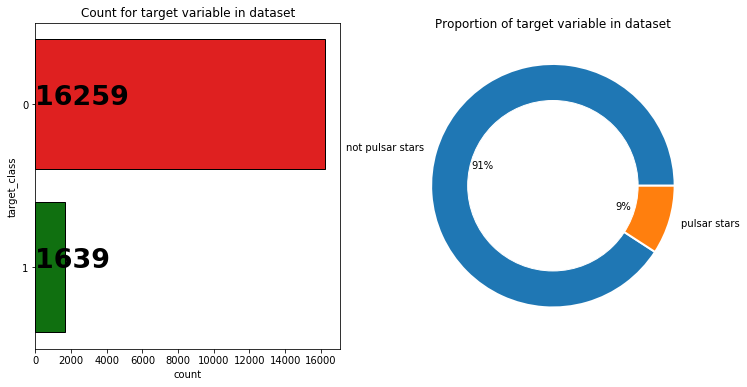

In [4]:
# import packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = data["target_class"],
                   palette=["r","g"],
                   linewidth=1,
                   edgecolor="k"*2)
for i,j in enumerate(data["target_class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in dataset")


plt.subplot(122)
plt.pie(data["target_class"].value_counts().values,
        labels=["not pulsar stars","pulsar stars"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

<center>Figure 3. Count (left) and proportion (right) of target variable in dataset</center>

<div style="text-align: justify"> The dataset contains 17898 candidates for which only 1639 (~9%) are classified as real pulsars. In addition, the dataset consists of features rather than raw data from observations. The eight features considered in the study are given above as column headers. The first four are the usual statistics obtained from the integrated pulse profile. A class label ("target_class") is also included which determines if the candidate is considered to be a pulsar (1) or not (0). This serves as our target column for the analysis. </div>

### 2.2 Preprocessing and Statistical Analysis of the Data

<div style="text-align: justify"> When dealing with all sorts of data, an important first step is to often get a sense on how the variables are distributed. As seen above, the dataset can be considered clean and complete as there are no missing data and the number of features is relatively small. This reduces extra steps towards feature engineering as there is not much to do for artificial design features. Thus, we can see readily that the preprocessing stage only involves two main issues. First is the possible problem of overfitting since the difference between the numbers of candidates identified as pulsars and non-pulsars is large, with a ratio of about 1:10. The other issue is the huge distribution for the range differences of the eight features. This is evident in Figure 4 which depicts the distribution of variables in the dataset with associated mean and standard deviation. The plots were done using the distplot() function in the package seaborn. This draws a histogram and fit a kernel density estimate (KDE). </div>

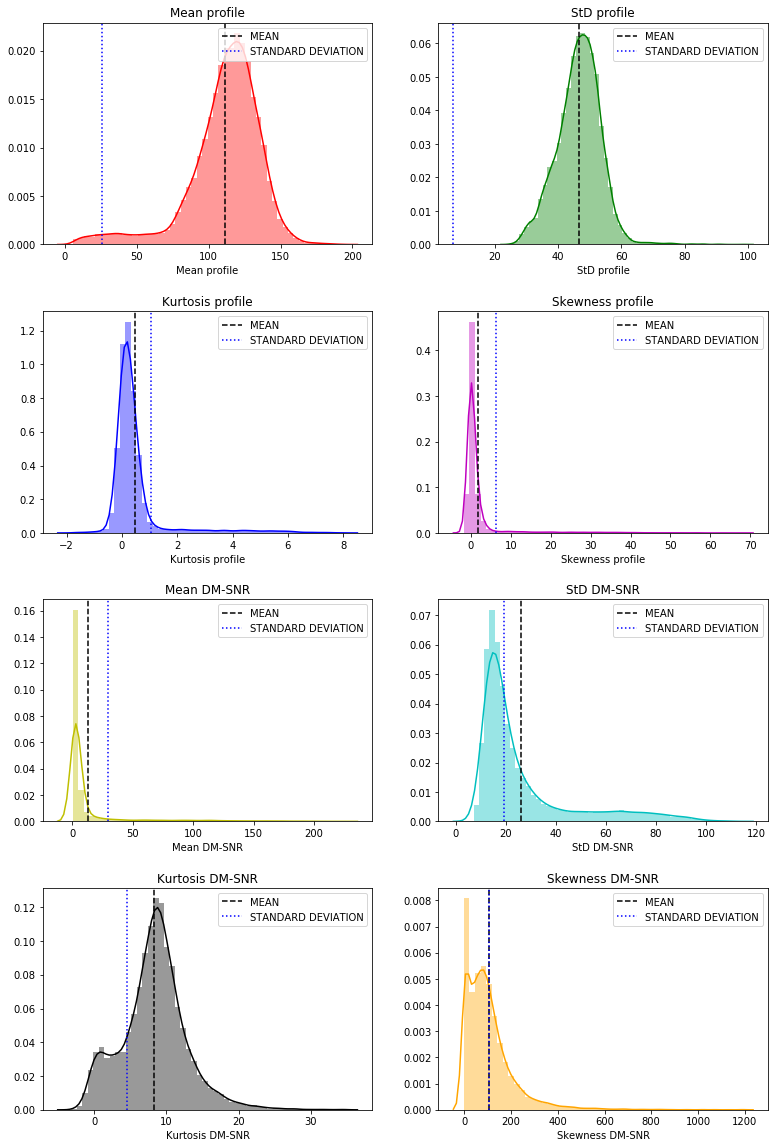

In [5]:
# import package
import itertools
# rename column headers for convenience
data = data.rename(columns={" Mean of the integrated profile": "Mean profile", " Standard deviation of the integrated profile": "StD profile", 
                    " Excess kurtosis of the integrated profile": "Kurtosis profile", " Skewness of the integrated profile": "Skewness profile",
                    " Mean of the DM-SNR curve": "Mean DM-SNR", " Standard deviation of the DM-SNR curve": "StD DM-SNR", 
                    " Excess kurtosis of the DM-SNR curve": "Kurtosis DM-SNR", " Skewness of the DM-SNR curve": "Skewness DM-SNR",
                    "target_class": "Target class"})

# distribution of variable in the dataset
columns = ['Mean profile', 'StD profile', 'Kurtosis profile', 'Skewness profile',
           'Mean DM-SNR', 'StD DM-SNR', 'Kurtosis DM-SNR',
           'Skewness DM-SNR']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

<center>Figure 4. Distribution of variables in the dataset</center>

<div style="text-align: justify"> Before delving into any analysis, we would like to decrease the amount of data to look at. This can be achieved by performing a correlation plot. As seen in Figure 5, the features that correlate the most with the class (pulsar or non-pulsar) are the mean, the excess kurtosis, and the skewness of the integrated profile. We could choose to only analyze these, but this would mean that pulsars can be identified with only one of the two plots that astrophysicists use to classify the data. In this case, colinearity may become a problem since these features are strongly correlated with each other. </div>

In [8]:
# correlation matrix
corr_matrix = data.corr()
# the figure needs to be corrected manually so we just load here the saved file
# just uncomment the lines below to run the plot (ctrl + /)
# plt.figure(figsize=(15,7))
# sns.heatmap(corr_matrix,annot=True,linewidth=2,edgecolor='k')
# plt.title('Correlation matrix')
# plt.savefig('corrmatrix.png')
# plt.show()

<img src="corrmatrix.png" width="900" align="center"/>

<center>Figure 5. Correlation of the features of the data of pulsars</center>

<div style="text-align: justify"> On the other hand, we can also look at how each variable looks when plotted agains each other. From Figure 6, we notice that even though the correlation with class is not very high for the skewness of the DM-SNR curve as compared to the integrated mean and standard deviation of the same curve, we can clearly see allowed regions for pulsars which may be useful when attempting a decision tree solution. Looking now at the diagonal plots of Figure 6, we can see that many variables have peaks clearly distanced from each other or rather we see very pronounced peaks when plotting pulsar and non-pulsar together. This means that although the correlation with the class is low, some features may become important when solving the classification problem. We can understand this better by looking at the violin plots in Figure 7.

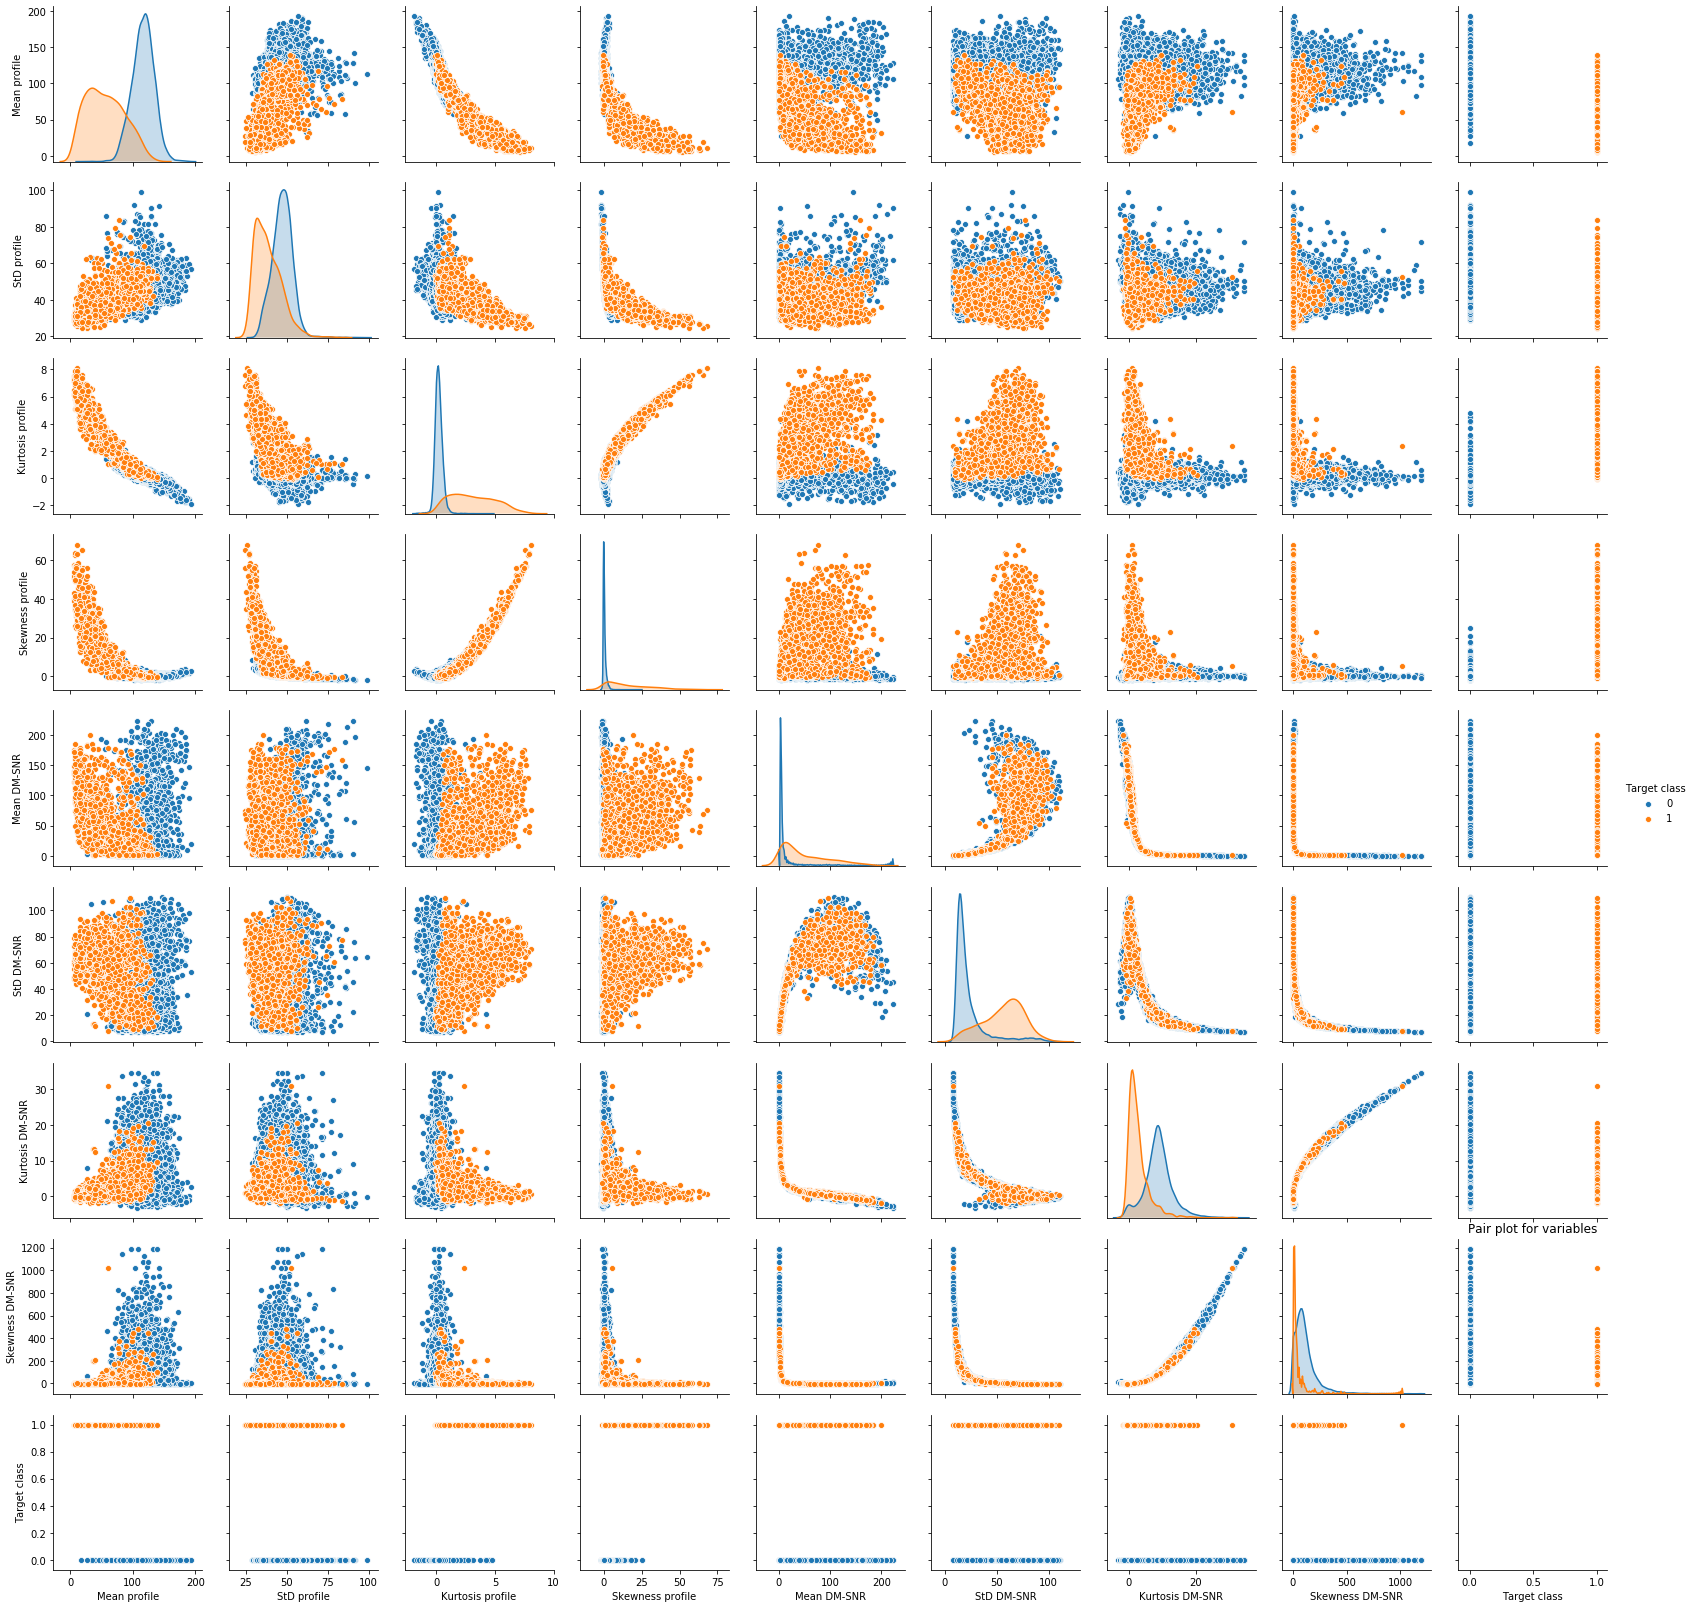

In [9]:
# Pair plots
sns.pairplot(data,hue = "Target class")
plt.title("Pair plot for variables")
# plt.savefig('pairplot.png',bbox_inches='tight')
plt.show()

<center> Figure 6. Pair plot between all variables. In the diagonal, a plot of each variable separated by class. The off-diagonal terms are features plotted against each other. Here, the label 1 refers to pulsar and the label 0 to non-pulsar. </center>

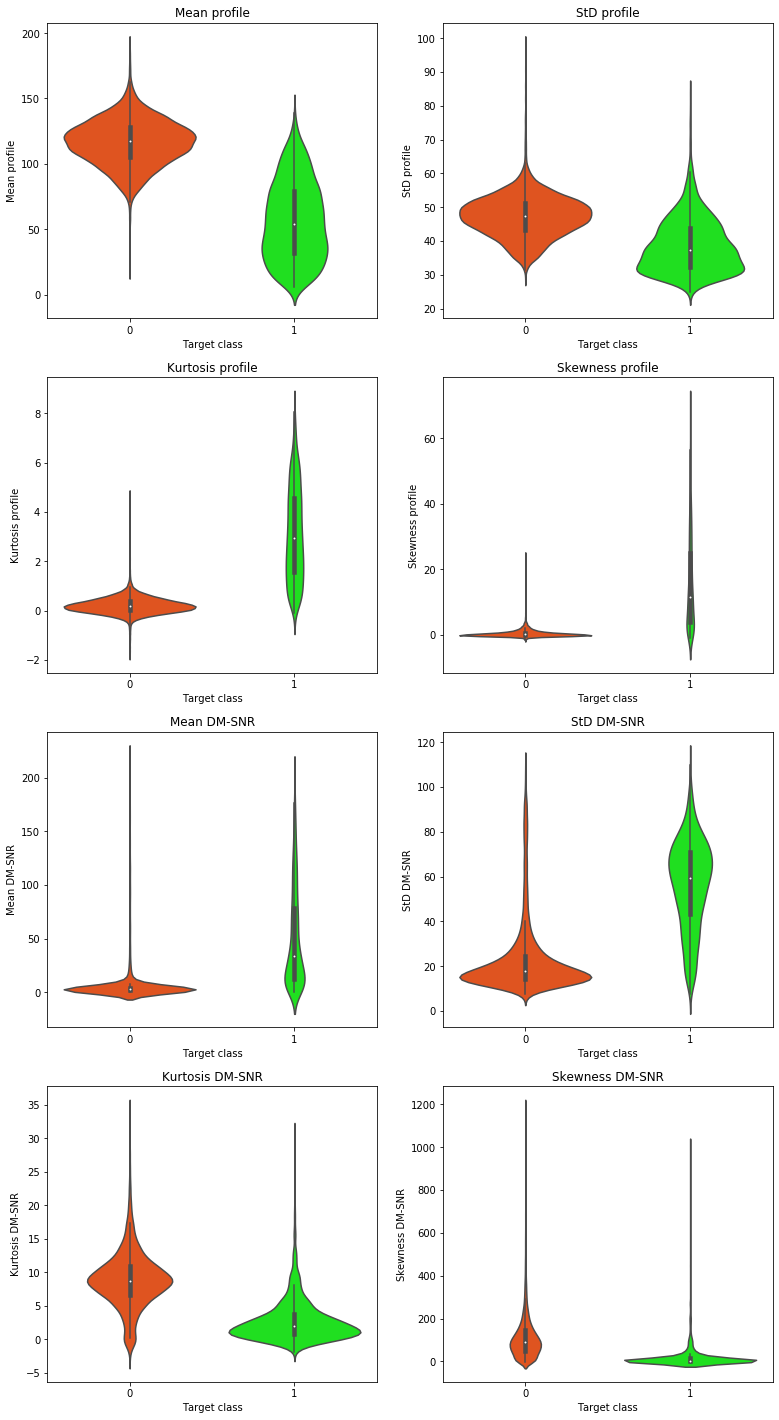

In [10]:
# Violin Plot
columns = [x for x in data.columns if x not in ["Target class"]]
length  = len(columns)
plt.figure(figsize=(13,25))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=data["Target class"],y=data[i],
                   palette=["Orangered","lime"],alpha=.5)
    plt.title(i)
#plt.savefig('violinplot.png',bbox_inches='tight')
plt.show()

<center>Figure 7. Violin plots for each feature separated by class. </center>

### 2.3 Methods and Algorithms

<div style="text-align: justify"> In machine learning, computer algorithms are being built such that they enable machines to learn from data. That is, the more data is fed to an algorithm, the more capable it is in understanding and deciphering the underlying patterns within a particular dataset [10]. In this project, models used for classification problems will be implemented. These classifiers include logistic regression, neural network, decision tree, and random forest. Moreover, the cross-validation (CV) resampling technique was also inlcuded. Advanced tools like a confusion matrix and a classification profile are also used in order to interpret the results.

#### 2.3.1 Logistic Regression

<div style="text-align: justify"> Classification problems are concerned with outcomes that are discrete, meaning they take the form of categorical variables. Here, logistic regression is one of the most widely used machine learning algorithm. This method deals with binary, dichotomous outcomes [11]. In addition, it utilizes a sigmoidal function to determine whether data points should approach one value or the other [10]. For the pulsar dataset used, we have the target class which are already classified as either 0s or 1s. </div>

<div style="text-align: justify"> Considering that the dependent variables, otherwise known as responses or the outcomes, $y_{i}$ are discrete and only take values from $k = 0, 1, ..., K - 1$ (which lists the $K$ classes). We then have the goal to predict the output classes from the design matrix $\hat{X}\in\mathbb{R}^{n\times p}$ whcih consist of $n$ samples. Each of these samples carries $p$ features or predictors. Eventually, the new goal leads to identifying the classes to which new unseen samples belong [11]. </div>

<div style="text-align: justify"> For now, we try to understand using an example where there are two classes only, with outputs $y_i=0$ and $y_i=1$. In this project, this represent the outcomes for the classification of the pulsar candidates. Equivalently,

$$
y_i = \begin{bmatrix} 0 & \mathrm{no}\\  1 & \mathrm{yes} \end{bmatrix}.
$$

<div style="text-align: justify"> To understand better, we first try to use a simple linear classifier. That is, we use the linear regression model in classifying these two outcomes. One example is that we could fit a linear model to the default case if $y_i > 0.5$ and the no default case $y_i \leq 0.5$. Therefore, we would have our weighted linear combination as
    
$$
\begin{equation}
\hat{y} = \hat{X}^T\hat{\beta} +  \hat{\epsilon},
\label{_auto1} \tag{1}
\end{equation}
$$
    
<div style="text-align: justify"> where $\hat{y}$ is a vector representing the possible outcomes, $\hat{X}$ is our
$n\times p$ design matrix and $\hat{\beta}$ represents our estimators/predictors. </div>

<div style="text-align: justify"> The main problem here is that the proposed function takes values on the entire real axis. However, for logistic regression, the outputs are discrete variables. In order to get discrete outputs, one can have sign functions that map the output of a linear regressor to values $\{0,1\}$,
$f(s_i)=sign(s_i)=1$ if $s_i\ge 0$ and 0 if otherwise. This is called the "perceptron" model in the machine learning literature [11]. </div>

<div style="text-align: justify"> The perceptron model is said to be an example of a "hard classification" for which each datapoint is assigned to a category. Despite being a simple model, "soft classifiers" are still being preferred in many cases. This outputs the probability of a given category instead. Logistic regression
is considered to be the most common example under the so-called soft classifier. In logistic
regression, the probability that a data point $x_i$
belongs to a category $y_i=\{0,1\}$ is given by the Sigmoid function which is meant to represent the likelihood for a given event,
    
$$
p(t) = \frac{1}{1+\mathrm \exp{-t}}=\frac{\exp{t}}{1+\mathrm \exp{t}}.
$$
    
We note here that $1-p(t)= p(-t)$. </div>

<div style="text-align: justify"> In our problem, there are eight predictors. Therefore, we can define $\hat{x}=[1,x_1,x_2,\dots,x_8]$ and weights we wish to extract from data as $\hat{\beta}=[\beta_0, \beta_1, \dots, \beta_8]$. The probabilities can be written as

$$
\begin{align*}
p(y_i=1|\hat{\beta}\hat{x})&=\frac{ \exp{(\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_8x_8)}}{1+\exp{(\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_8x_8)}},\nonumber\\
p(y_i=0|\hat{\beta}\hat{x}) &= 1 - p(y_i=1|\hat{\beta}\hat{x}).
\end{align*}
$$
</div>

<div style="text-align: justify"> The cost function is defined using Maximum Likelihood Estimation (MLE). We consider a dataset $\mathcal{D}=\{(y_i,x_i)\}$, with the binary labels $y_i\in\{0,1\}$ and where the data points are drawn independently. Now, we try to maximize the probability of seeing the observed data for which we can then approximate the likelihood in terms of the product of the individual probabilities of a specific outcome $y_i$ as given below
    
$$
\begin{align*}
P(\mathcal{D}|\hat{\beta})& = \prod_{i=1}^n \left[p(y_i=1|x_i,\hat{\beta})\right]^{y_i}\left[1-p(y_i=1|x_i,\hat{\beta}))\right]^{1-y_i}\nonumber. \\
\end{align*}
$$
    
Here, we obtain the log-likelihood and our **cost/loss** function 
    
$$
\mathcal{C}(\hat{\beta}) = \sum_{i=1}^n \left( y_i\log{p(y_i=1|x_i,\hat{\beta})} + (1-y_i)\log\left[1-p(y_i=1|x_i,\hat{\beta}))\right]\right).
$$
    

<div style="text-align: justify">
    
The MLE is defined as the set of parameters that maximize the log-likelihood with respect to $\beta$. The right hand side of the above equation is known as the **cross entropy** in statistics. The cross entropy is a convex function of the weights $\hat{\beta}$. Hence, any local minimizer is a global minimizer. Here, one must perform numerical methods to solve the optimization problem. 
    

<div style="text-align: justify">
    
In this project, we used the available functionality of scikit-learn for logistic regression, which is **LogisticRegression**. The cross-validation resampling technique (described later) was also added to compute the accuracy scores for the test and training data. The code is describled as follows:

In [6]:
##############################################
# Logistic regression  with cross-validation #
##############################################

# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# We define the hyperparameters to be used
nlambdas = 500 # why not? the code runs relatively fast
lmbdas = np.logspace(-5, 5, nlambdas)
kfold = KFold(n_splits = 5) #cross validation spliting


# We preallocate data 
# true values that will be found later
train_accuracy=np.zeros(lmbdas.shape,np.float64)
test_accuracy=np.zeros(lmbdas.shape,np.float64)
train_red_accuracy=np.zeros(lmbdas.shape,np.float64)
test_red_accuracy=np.zeros(lmbdas.shape,np.float64)
# dummy arrays to be averaged later on
train_accuracy_d=np.zeros(5,np.float64)
test_accuracy_d=np.zeros(5,np.float64)
train_red_accuracy_d=np.zeros(5,np.float64)
test_red_accuracy_d=np.zeros(5,np.float64)

# We create the design matrix X and separate the labels into Y
x_fea = [x for x in data.columns if x not in ['Target class']]
#print(x_fea)
X = np.zeros((data.shape[0],data.shape[1]-1))
X_red = np.zeros((data.shape[0],3))
Y = np.zeros(data.shape[0])
for i,feature in enumerate(x_fea): # Here we just take the variables of interest
    X[:,i] = data[feature]
    if 'Mean profile' == feature:
        X_red[:,0]
    if 'Kurtosis profile' == feature:
        X_red[:,1]
    if 'Skewness profile'== feature: 
        X_red[:,2]
Y[:] = data['Target class']
# We perform a logistic regression for each value of lambda
for i,lmbda in enumerate(lmbdas):
    #define model
    logreg = LogisticRegression(C=1.0/lmbda,solver='liblinear')

    # Perform the cross-validation
    j = 0
    for train_inds, test_inds in kfold.split(X):
        # Do the split
        X_train = X[train_inds]
        X_red_train = X_red[train_inds]
        Y_train = Y[train_inds]

        X_test = X[test_inds]
        X_red_test = X_red[test_inds]
        Y_test = Y[test_inds]

        # We will scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        # first on full data
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        # then rescale and do on reduced data
        scaler.fit(X_red_train)
        X_red_train = scaler.transform(X_red_train)
        X_red_test = scaler.transform(X_red_test)
        del scaler

        # calculate accuracies for the k fold
        logreg.fit(X_train, Y_train)
        train_accuracy_d[j]=logreg.score(X_train,Y_train)
        test_accuracy_d[j]=logreg.score(X_test,Y_test)

        logreg.fit(X_red_train, Y_train)
        train_red_accuracy_d[j]=logreg.score(X_red_train,Y_train)
        test_red_accuracy_d[j]=logreg.score(X_red_test,Y_test)
        j += 1
        del X_red_train,X_red_test,X_train,Y_train,X_test,Y_test # delete useless data
    #Average to get accuracy values
    train_accuracy[i]=np.mean(train_accuracy_d)
    test_accuracy[i]=np.mean(test_accuracy_d)
    train_red_accuracy[i]=np.mean(train_red_accuracy_d)
    test_red_accuracy[i]=np.mean(test_red_accuracy_d)
    
    #print((i+1)/5,'% done')

#plot
# just uncomment the lines below to run the plot (ctrl + /)
# plt.figure(figsize=(15,7))
# plt.semilogx(lmbdas,train_accuracy,label='train')
# plt.semilogx(lmbdas,test_accuracy,label='test')
# plt.semilogx(lmbdas,train_red_accuracy,label='train reduced') 
# # #train and test differ very little so to see the different lines we use '--'
# plt.semilogx(lmbdas,test_red_accuracy,'--',label='test reduced')
# plt.xlabel('$\\lambda$')
# plt.ylabel('$\\mathrm{accuracy}$')
# plt.grid()
# plt.legend()
# # #plt.savefig('logreg.png',bbox_inches='tight')
# plt.show()


#### 2.3.2 Neural Networks

<div style="text-align: justify"> Artificial Neural Networks (ANN) are said to be computing systems which can learn to perform tasks by considering examples. In general, they are no longer built or programmed with any task-specific rules. These systems consist of layers of connected neurons which is derived from its biological reference. That is, the algorithm tries to mimic the functionality of the brain wherein neurons interact by sending signals in the form of mathematical functions between layers. Here, all layers can contain an arbitrary number of neurons for which each connection is represented by a weight variable [12]. </div>

<div style="text-align: justify"> Historically, the feed-forward neural network (FFNN) was the first and simplest type of ANN, with a certain characteristic that information is always fed forward through the layers. These layers (e.g. an input layer, one or more hidden layers, and an output layer) comprise a network. In addition, layers are composed of neurons that have non-linear activation functions as depicted in Figure 8. Such networks are often called as multilayer perceptrons (MLPs). Moreover, an activation function in FFNN needs to be non-constant, bounded, monotonically increasing, and continuous. Typical activation functions used are the logistic Sigmoid and the hyperbolic tangent [12]. In this project, the former was used.

<img src="n4layer.png" width="500" align="center"/>

<center>Figure 8. Four-layer network containing two hidden layers [13]. </center>

<div style="text-align: justify"> Given an activation function at $l$-th layer $f^{l}$, the output at a node in this layer is </div>
    
$$
y^{l}_{i} = f^{l}(u^{l}_{i}) = f^{l}(\sum_{j=1}^{N_{l-1}}w^{l}_{ij}y^{l-1}{j} + b^{l}_{i})
$$
    

<div style="text-align: justify"> in which the index j runs over all nodes in the preceding layer. The variables $w^{l}_{ij}$ and $b^{l}_{i}$ are called weight and bias, respectively. From here, we need to find weights such that the error of our model is as small as possible. This is often solved using back propagation algorithm. </div>

<div style="text-align: justify"> The cost function is defined as 
    
$$
C(w, b) = \frac{1}{2}\sum^{n}_{i=1}(y_{i}-t_{i})^{2}
$$

where $t_{i}$ are targets, and $y_{i}$ are the outputs of the network. The minimization of the cost function can be done using the following steps:

1. Initialize the NN with random value of weigths $w^{l}_{ij}$ and biases $b^{l}_{i}$.
    
2. Propagate forwards to find outputs $y_{i}$ and compute the corresponding $C(w, b)$.
    
3. Use back propagation algorithm to find optimal $w^{l}_{ij}$ and $b^{l}_{i}$.
    
4. Repeat steps 2 and 3 until $\frac{\partial C}{\partial w} = 0$ and $\frac{\partial C}{\partial b} = 0$.

<div style="text-align: justify"> In the optimization of the cost function, one of the most common methods used is the gradient descent. It involves a parameter called the learning rate $\eta$, which controls how big a step we take towards the minimum. Moreover, in order to constrain the size of the weights so they don't grow out of control, a term with the regularization parameter $\lambda$ is added to the cost function. </div>

<div style="text-align: justify"> In this project, we again emphasize that we did not develop the code according to the aforementioned steps. Instead, we have utilized the **MLPRegressor** functionality in scikit-learn. In addition, the accuracies for both the training and test data are obtained as a function of $\eta$ and $\lambda$. The optimal values of $\eta$ and $\lambda$ are those which correspond to the best accuracy for the test data. From this, the optimal weights and biases are found from the coefs_ in scikit-learn. </div>

In [7]:
################################################
#           Neural Network                     #
################################################
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

#Split data with 20% of test data:
np.random.seed(2018)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

# Define the learning rate, hyperparameter using NUMPY 
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
n_hidden_neurons = 50
epochs = 100
# Use scikit learn for neural network 
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs, solver='adam')
        dnn.fit(X_train, y_train)
        DNN_scikit[i][j] = dnn
        # just uncomment below to print the accuracy scores
        #print("Learning rate  = ", eta)
        #print("Lambda = ", lmbd)
        #print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        #print()

        
#Plot the accuracy as function of learning rate and hyperparameter
# just uncomment the lines below to generate the plots (ctrl + /)

# sns.set() 
# train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
# test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

# for i in range(len(eta_vals)):
#     for j in range(len(lmbd_vals)):
#         dnn = DNN_scikit[i][j]
#         train_pred = dnn.predict(X_train) 
#         test_pred = dnn.predict(X_test)
#         train_accuracy[i][j] = accuracy_score(y_train, train_pred)
#         test_accuracy[i][j] = accuracy_score(y_test, test_pred)
        
# fig, ax = plt.subplots(figsize = (10, 10))        
# sns.heatmap(train_accuracy, annot=True,annot_kws={"size": 18}, ax=ax, cmap="viridis")
# ax.set_title("Training Accuracy",fontsize=18)
# ax.set_ylabel("$\eta$",fontsize=18)
# ax.set_yticklabels(eta_vals)
# ax.set_xlabel("$\lambda$",fontsize=18)
# ax.set_xticklabels(lmbd_vals)
# plt.tick_params(labelsize=18)
 
# fig, ax = plt.subplots(figsize = (10, 10))
# sns.heatmap(test_accuracy, annot=True,annot_kws={"size": 18}, ax=ax, cmap="viridis")
# ax.set_title("Test Accuracy",fontsize=18)
# ax.set_ylabel("$\eta$",fontsize=18)
# ax.set_yticklabels(eta_vals)
# ax.set_xlabel("$\lambda$",fontsize=18)
# ax.set_xticklabels(lmbd_vals)
# plt.tick_params(labelsize=18)
# #plt.show()        

#Plot confusion matrix at optimal values of learning rate and hyperameter
# just uncomment the lines below to generate the plots (ctrl + /)

# dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',

#                             alpha=0.001, learning_rate_init=0.001, max_iter=epochs, solver='adam')
# dnn.fit(X_train,y_train)
# y_pred=dnn.predict(X_test)
# fig1, ax = plt.subplots(figsize = (13,10))
# sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
# ax.set_xlabel('True label',fontsize=18)
# ax.set_ylabel('Predicted label',fontsize=18)
# ax.set_title("CONFUSION MATRIX",fontsize=20)
# plt.tick_params(labelsize=18)
# plt.show()
# # Feature importance -->weights
# coef=dnn.coefs_[0]
# print (coef)

#### 2.3.3 Random Forests and Decision Trees

<div style="text-align: justify"> The Random Forests (RF) algorithm is said to be an ensemble method widely employed for various complex classification tasks. A random forest is composed of a family of randomized tree-based classifiers known as decision trees. These decision trees are high-variance, weak classifiers that can be easily randomized. Hence, they are ideally suited for ensemble-based methods [11]. </div>

<div style="text-align: justify"> A decision tree utilizes a series of questions to hierarchically partition the data. Figure 9 shows an example of a decision tree aimed at addressing a problem concerning the identification of a certain feature whether it is larger than a given number or not. As seen there, each branch of the decision tree consists of a question that splits the data into smaller subsets for which the leaves or end points correspond to the ultimate partitions of the data.

<img src="dectree.PNG" width="500" align="center"/>

<center>Figure 9. A schematic diagram of a decision tree. For a given input observation $x$, its label $y$ is predicted by traversing it from the root all the way down the leaves, following branches it satisfies [11]. </center>

<div style="text-align: justify"> In classification problems, the goal of using decision trees is to construct trees such that the partitions should be informative about the class label or category. One may infer that more complex decision trees can lead to finer partitions that may give improved performance on the training set. The problem here, however, is that this generally leads to overfitting which limits the out-of-sample performance. Because of this, decision trees employ some form of regularization in order to control the complexity and to reduce overfitting. Decision trees also exhibit high variance, and are often very sensitive to various details of the training data. Thus, individual decision trees are weak classifiers yet this property also make them ideal for incorporation in an ensemble method. In order to create an ensemble of decision trees, a randomization procedure should be introduced. The power of ensembles to reduce variance only manifests when randomness reduces correlations between the classifiers within the ensemble. Randomness is introduced in RF.</div>

The code for solving pulsar classification problem using Decision Tree is decribed as follows:

In [8]:
###########################################################
# Decision Tree  WITHOUT CROSS VALIDATION                 #
###########################################################
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
from PIL import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate # We can use this available functionality. In the code, we built our own CV
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

#Split data
np.random.seed(2030)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

# The maximum depth of the tree:
max_degree=20
maxdepth=np.zeros(max_degree)  # Make an array with different max_depth
#Initialize accuracy arrays for training and test data for gini and entropy criteria:
train_accuracy_gini=np.zeros(max_degree)
test_accuracy_gini=np.zeros(max_degree)
train_accuracy_entropy=np.zeros(max_degree)
test_accuracy_entropy=np.zeros(max_degree)

for i in range(1,max_degree+1):
    maxdepth[i-1]=i
    #Decision tree method with gini criteria
    tree_gini = DecisionTreeClassifier(max_depth=i)
    tree_gini.fit(X_train, Y_train)
    train_accuracy_gini[i-1]=tree_gini.score(X_train, Y_train)
    test_accuracy_gini[i-1]=tree_gini.score(X_test, Y_test)
    #Decision tree method with entropy criteria
    tree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    tree_entropy.fit(X_train, Y_train)
    train_accuracy_entropy[i-1]=tree_entropy.score(X_train, Y_train)
    test_accuracy_entropy[i-1]=tree_entropy.score(X_test, Y_test)
    
# just uncomment the lines below to generate the plots (ctrl + /)
# print("accuracy on training data with criterion gini [tree]=",np.around(train_accuracy_gini,decimals=2))
# print("accuracy on test data with criterion gini[tree]=", np.around(test_accuracy_gini,decimals=2))
# print("accuracy on training data with criterion entropy [tree]=",np.around(train_accuracy_entropy,decimals=2))
# print("accuracy on test data with criterion entrpy [tree]=", np.around(test_accuracy_entropy,decimals=2))
# #Plot the accuracy for training and test data as a function of max_depth
# fig, tree=plt.subplots()
# tree.set_xlabel('max_depth')
# tree.set_ylabel('accuracy')
# tree.set_title('Decision Tree')
# tree.plot(maxdepth,train_accuracy_gini, color='r', label='Training [Gini]' )
# tree.plot(maxdepth,test_accuracy_gini, color='r',linestyle="--", label='Test [Gini]' )
# tree.plot(maxdepth,train_accuracy_entropy, color='b', label='Training [entropy]' )
# tree.plot(maxdepth,test_accuracy_entropy, color='b',linestyle="--", label='Test [entropy]' )
# tree.legend()

# CONFUSION MATRIX for gini criteria and max_depth=7
# just uncomment the lines below to generate the plots (ctrl + /)
# tree= DecisionTreeClassifier(max_depth=7)
# tree.fit(X_train,y_train)
# y_pred=tree.predict(X_test)
# fig, matrix = plt.subplots(figsize = (13,10))
# sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
# matrix.set_xlabel('True label',fontsize=18)
# matrix.set_ylabel('Predicted label',fontsize=18)
# matrix.set_title("CONFUSION MATRIX",fontsize=20)
# plt.tick_params(labelsize=18)
# plt.show()

Including CV resampling technique, the code is written as follows:

In [9]:
#######################################
#Decision Tree  WITH CROSS VALIDATION #
#######################################
# Initialize the standard deviation for the accuracy scores
train_var_gini=np.zeros(max_degree,np.float64)
test_var_gini=np.zeros(max_degree,np.float64)
train_var_entropy=np.zeros(max_degree,np.float64)
test_var_entropy=np.zeros(max_degree,np.float64)
k = 10
# dummy arrays to be averaged later on
train_accuracy_gini_d=np.zeros(k,np.float64)
test_accuracy_gini_d=np.zeros(k,np.float64)
train_accuracy_entropy_d=np.zeros(k,np.float64)
test_accuracy_entropy_d=np.zeros(k,np.float64)

# Number of kfold for CV
kfold = KFold(n_splits = k)
#Decision Tree
for i in range(1,max_degree+1):
    maxdepth[i-1]=i
    tree_gini = DecisionTreeClassifier(max_depth=i)
    tree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    # Perform the cross-validation
    j = 0
    for train_inds, test_inds in kfold.split(X):
        # Do the split
        X_train = X[train_inds]
        Y_train = Y[train_inds]
        X_test = X[test_inds]
        Y_test = Y[test_inds]

        # We will scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        # first on full data
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        del scaler
        # calculate accuracies for the k fold
        tree_gini.fit(X_train, Y_train)
        train_accuracy_gini_d[j]=tree_gini.score(X_train,Y_train)
        test_accuracy_gini_d[j]=tree_gini.score(X_test,Y_test)
        tree_entropy.fit(X_train, Y_train)
        train_accuracy_entropy_d[j]=tree_entropy.score(X_train,Y_train)
        test_accuracy_entropy_d[j]=tree_entropy.score(X_test,Y_test)
        j += 1
    #print(i/(max_degree)*100,'%')
    #print(test_accuracy_gini_d,'gini',i)
    #print(test_accuracy_entropy_d,'entropy',i)
    #print(' ')

    train_accuracy_gini[i-1]=np.mean(train_accuracy_gini_d)
    test_accuracy_gini[i-1]=np.mean(test_accuracy_gini_d)
    train_accuracy_entropy[i-1]=np.mean(train_accuracy_entropy_d)
    test_accuracy_entropy[i-1]=np.mean(test_accuracy_entropy_d)

    train_var_gini[i-1]=np.std(train_accuracy_gini_d)
    test_var_gini[i-1]=np.std(test_accuracy_gini_d)
    train_var_entropy[i-1]=np.std(train_accuracy_entropy_d)
    test_var_entropy[i-1]=np.std(test_accuracy_entropy_d)

#Plot the accuracy for training and test data as a function of max_depth
# just uncomment the lines below to generate the plots (ctrl + /)
# fig, tree=plt.subplots()
# tree.set_xlabel('max_depth')
# tree.set_ylabel('accuracy')
# tree.plot(maxdepth,train_accuracy_gini, color='r', label='Training [Gini]' )
# tree.plot(maxdepth,test_accuracy_gini, color='r',linestyle="--", label='Test [Gini]' )
# tree.plot(maxdepth,train_accuracy_entropy, color='b', label='Training [entropy]' )
# tree.plot(maxdepth,test_accuracy_entropy, color='b',linestyle="--", label='Test [entropy]' )
# tree.legend()
# #plor the variance for training and test data as a function of max_depth
# fig, treevar=plt.subplots()
# treevar.set_xlabel('max_depth')
# treevar.set_ylabel('accuracy standard deviation')
# treevar.plot(maxdepth,train_var_gini, color='r', label='Training [Gini]' )
# treevar.plot(maxdepth,test_var_gini, color='r',linestyle="--", label='Test [Gini]' )
# treevar.plot(maxdepth,train_var_entropy, color='b', label='Training [entropy]' )
# treevar.plot(maxdepth,test_var_entropy, color='b',linestyle="--", label='Test [entropy]' )
# treevar.legend()

# plt.show()

For Random Forest, we use a larger max_depth in order to check the behavior of the accuracy of training and test data in that regime. The code used is as follows:

In [ ]:
############################################################
#   Random Forest                                          #
############################################################
from sklearn.ensemble import RandomForestClassifier
#Split data
maxdegree=40
maxdepth=np.zeros(maxdegree)  # Make an array with different max_depth
np.random.seed(2030)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)
# Initialize the array for accuracy with different max_depth
train_accuracy_forest_gini=np.zeros(maxdegree)
test_accuracy_forest_gini=np.zeros(maxdegree)
train_accuracy_forest_entropy=np.zeros(maxdegree)
test_accuracy_forest_entropy=np.zeros(maxdegree)
for i in range(1,maxdegree+1):
    # Random Forest Method with 100 trees
    maxdepth[i-1]=i
    forest_gini=RandomForestClassifier(n_estimators=100, max_depth=i)
    forest_gini.fit(X_train, Y_train)
    train_accuracy_forest_gini[i-1]=forest_gini.score(X_train, Y_train)
    test_accuracy_forest_gini[i-1]=forest_gini.score(X_test, Y_test)
    forest_entropy=RandomForestClassifier(n_estimators=100, max_depth=i)
    forest_entropy.fit(X_train, Y_train)
    train_accuracy_forest_entropy[i-1]=forest_entropy.score(X_train, Y_train)
    test_accuracy_forest_entropy[i-1]=forest_entropy.score(X_test, Y_test)
    #print(i/(maxdegree)*100,'%')
# just uncomment the lines below to generate the plots (ctrl + /)
# print("accuracy on training data with criterion gini [forest]=",np.around(train_accuracy_forest_gini,decimals=2))
# print("accuracy on test data with criterion gini [forest] =", np.around(test_accuracy_forest_gini,decimals=2))
# print("accuracy on training data with criterion entropy [forest]=",np.around(train_accuracy_forest_entropy,decimals=2))
# print("accuracy on test data with criterion entrpy [forest]=", np.around(test_accuracy_forest_entropy,decimals=2))

#Plot the accuracy for training and test data as a function of max_depth
# just uncomment the lines below to generate the plots (ctrl + /)
# fig, forest=plt.subplots()
# forest.set_xlabel('max_depth')
# forest.set_ylabel('accuracy')
# forest.set_title('Random Forest')
# forest.plot(maxdepth,train_accuracy_forest_gini, color='r', label='Training [Gini]' )
# forest.plot(maxdepth,test_accuracy_forest_gini, color='r',linestyle="--", label='Test [Gini]' )
# forest.plot(maxdepth,train_accuracy_forest_entropy, color='b', label='Training [entropy]' )
# forest.plot(maxdepth,test_accuracy_forest_entropy, color='b',linestyle="--", label='Test [entropy]' )
# forest.legend()

# CONFUSION MATRIX for gini criteria and max_depth=12
# just uncomment the lines below to generate the plots (ctrl + /)

# forest=RandomForestClassifier(n_estimators=100, max_depth=12)
# forest.fit(X_train,Y_train)
# y_pred=forest.predict(X_test)
# fig, matrix = plt.subplots(figsize = (13,10))
# sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
# matrix.set_xlabel('True label',fontsize=18)
# matrix.set_ylabel('Predicted label',fontsize=18)
# matrix.set_title("CONFUSION MATRIX",fontsize=20)
# plt.tick_params(labelsize=18)
# plt.show()

#### 2.3.4 Cross Validation

<div style="text-align: justify"> We have also included a resampling method known as cross-validation (CV). It is used to structure the data splitting in order to avoid the unbalanced effect on either model building or prediction evaluation due to random split. Here, for example, the training data is usually split into five folds (standard value). The machine learning algorithm is then fit on one fold at a time and tested on the remaining data. The overall result is five different training and test sets that are all representative of the same data for whichh the mean of the scores is usually taken as the accuracy of the model. Mean test scores on different folds will always be more reliable as compared to only one mean test score on the entire set [10]. </div>

<div style="text-align: justify"> The algorithm that we have implemented for CV is already integrated in the machine learning techniques we have discussed above. </div>

#### 2.3.5 Accuracy Report

<div style="text-align: justify"> When discussing classification, it's important to understand whether the dataset is imbalanced [10]. In order to interpret the results of our classification, we have employed advanced tools such as a confusion matrix and a classification report. </div>

<div style="text-align: justify"> Confusion matrices were designated to reveal the truth behind imbalanced datasets. This can be understood using Figure 10 where the confusion matrix shows what happened to each of the outputs. Every output would fall into one of the four boxes labelled as "True positive (TP)", "False positive (FP)", "False negative (FN)", and "True negative (TN)". </div>

<img src="confprop.png" width="600" align="center"/>

<center>Figure 10. Overview of the confusion matrix (top) and its corresponding predictions based on conditions (bottom) [10]. </center>

<div style="text-align: justify"> The accuracy of the classification is given by:

$$
Accuracy = \frac{TN + TP}{TN + FP + TP + FN} 
$$


<div style="text-align: justify"> To estimate to which extent the model predicts correctly the pulsar (positive) with respect to the total number of true positive examples, we can use recall.  
$$
Recall = \frac{TP}{TP + FN} 
$$

<div style="text-align: justify">Precision is defined as the ratio between the number possitive examples which are predicted correctly over the total number of possitive examples predicted:
$$
Precision = \frac{TP}{TP + FP}
$$

These quantities are used to evaluate the prediction power of our models.

## 3. RESULTS AND DISCUSSION

### 3.1 Logistic Regression

<div style="text-align: justify"> The first attempt was a logistic regression. This was done by using an 80% - 20% train-test split and performing a 5-fold cross-validation. In addition, a standard scaler was used to scale the data. We also solved for different values of the hyperparameter $\lambda$ that contribute in the form of an $L_{2}$ penalty. We considered two cases. In the first model, all the features were taken into account, while in the second, only the mean, the excess kurtosis, and the skewness of the integrated profile were used. 
Reducing the number of features and taking the ones that correlate the most with class ended up giving a decent result of $\approx$ 0.9 accuracy. However, this result pales in comparison with the score of the full featured model $\approx$ 0.98. We expected these to happen since in the first model, only three features were used and those are the ones that correlate the most with the class. Using the right value for the hyperparameter is also important as evident in Figure 11. Here, using a hyperparameter greater than one will result in a reduced accuracy. However, for the reduced-feature case, we found the independence of the result to the hyperparamater. In Figure 12, we can see that false positives are more common than false negatives for small values of $\lambda$. In fact, as it can be seen in table 1, when calculating the precision we notice that it actually increases for big values of hyperparameter but at the cost of recall. This is a good sign, as we can give astrophysicists a reduced amount of data to evaluate manually. However, the existence of false positives means that improvements are still needed. Interestingly, for $\lambda = 10^{5}, 10^{6}$, this behavior reverses. </div>

<img src="logreg.png" width="500" align="center"/>

<center>Figure 11. Accuracy of the logistic regression as a function of the hyperparameter $\lambda$ for the training and test data with all the features and with reduced amount of features with cross-validation. </center>

<img src="confusionlogreg.png" width="500" align="center"/>

<center>Figure 12. Confusion matrices for different values of $\lambda$. The y-axis corresponds to predicted values while the x-axis to real values. These plots are done without cross-validation. </center>

<img src="Logisticregression_table.PNG" width="300" align="center"/>

<center>Table 1. Accuracy, recall, and precision for different values of $\lambda$ corresponding to Figure 12. </center

### 3.2 Neural Network

<div style="text-align: justify"> This subsection discusses the analysis of the results obtained using the neural network procedure with one hidden layer. The training-test data ratio is kept the same as in the case of logistic regression, which is 80%-20%. Moreover, the code was run for all seven values of learning rate $\eta$ and hyperparameter $\lambda$: $\eta, \lambda = {10^{-5}, 10^{-4}, ..., 10^{1}}$. The other parameters, which are the number of nodes in the hidden layer and epoch, were varied to see how they affect the accuracy scores. </div>

<div style="text-align: justify"> Figure 13 shows the accuracy scores of training data and test data using 50 hidden neurons and 10 epochs. We can see here that the use of neural network results in good predictions with high accuracy. The highest accuracy achieved is about 0.97 for $\eta = 10^{-4}, 10^{-3}, 10^{-2}$. At $\eta = 10^{-4}$, the value of the hyperparameter is no longer relevant as it does not affect the result.

<img src="NN_10epoch_50neurons.png" width="1000" align="center"/>

<center>Figure 13. Training accuracy (left panel) and test accuracy (right panel) for different $\eta$ and $\lambda$ using 50 hidden neurons and 10 epochs. </center>

<div style="text-align: justify"> Remaining the epoch number and increasing the number of hidden neurons to 100, the result obtained is depictede in Figure 14. In general, the increase in the number of hidden neurons does not change significantly the result, and the highest accuracy score obtained for the test data is still about 0.97. 

<img src="NN_10epoch_100neurons.png" width="1000" align="center"/>

<center>Figure 14. Training accuracy (left panel) and test accuracy (right panel) for different $\eta$ and $\lambda$ using 100 hidden neurons and 10 epochs. </center>

<div style="text-align: justify"> Since increasing the number of hidden neurons did not improve the accuracy for our prediction, we kept the old value for the number of hidden neurons which is 50. By using 100 epochs, the prediction accuracy improved to about 0.98 at $\eta = 10^{-3}$ and $\lambda = 10^{-3}, 10^{-2}$. This is evident in Figure 15. </div>

<img src="NN_100epoch_50neurons.png" width="1000" align="center"/>

<center>Figure 15. Training accuracy (left panel) and test accuracy (right panel) for different $\eta$ and $\lambda$ using 50 hidden neurons and 100 epochs. </center>

<div style="text-align: justify"> The performance of our classification model can be visualized using a confusion matrix. Figure 16 shows the confusion matrix in the case of 50 hidden neurons and 100 epochs at optimal values of the learning rate ($\eta = 10^{-3}$) and hyperparameter ($\lambda = 10^{-3}$). ). The values in the diagonal are the correct prediction (true negative (TN) and true positive (TP)) , while the ones off-diagonal are the wrong prediction (false negative (FN) and false positive (FP)). </div>

<img src="Confusionmatrix_NN.png" width="700" align="center"/>

<center> Figure 16. Confusion matrix for neutral network using 50 hidden neurons and 100 epochs at $\eta = 10^{-3}$ and $\lambda = 10^{-3}$. Output 0 indicates the non-pulsars (negative) while output 1 indicates the real pulsars (positive). </div>

<div style="text-align: justify"> The accuracy of the classification is given by:

$$
Accuracy = \frac{TN + TP}{TN + FP + TP + FN} = \frac{3230 + 262}{3230 + 68 + 262 + 20} \simeq 0.98
$$

which is the value that we expect. </div>

<div style="text-align: justify"> To estimate to which extent the model predicts correctly the pulsar (positive) with respect to the total number of true positive examples, we can use recall.
    
$$
Recall = \frac{TP}{TP + FN} = \frac{262}{262 + 20} \simeq 0.93
$$
 
This result means that most of the pulsars are recognized. </div>

<div style="text-align: justify"> Moreover, according to Figure 16, our model classified totally 330 candidates to the positive class, in which 262 candidates are predicted correctly. The ratio between these quantities is called the precision.
    
$$
Precision = \frac{TP}{TP + FP} = \frac{262}{330} \simeq 0.79
$$
    
The precision is not very high. This means that there are still a significant number of false positive candidates. In other words, there are 21% of predicted pulsars which are in fact, not pulsars. </div>

### 3.3 Decision Tree and Random Forest

<div style="text-align: justify"> The next attempted solution was via decision trees. This was done without CV and then with 5-fold CV, using a standard scaler, and solving for different maximum depths for the trees. Two criteria for the fit were cosidered: gini factor and the entropy. </div>

<div style="text-align: justify">  Decision trees are known to have high variance, so an analysis on the standard deviation for the accuracies was done. Without CV, the accuracy score obtained is depicted in Figure 17. The difference between Gini and entropy critetia is noticible. In this case, Gini criteria (red) results in better accuracy than entropy criteria (blue). The maximum accuracy achieved by decision tree using the former criteria is about 0.98  with number of max_depth = 3 to max_depth = 7. The confusion matrix drawn with this max_depth and using Gini criteria is shown in Figure 18. The accuracy, recall, and precision are respectively 0.98, 0.91, and 0.83. The accuracy computed from the confusion matrix is the same as what we expect from the figure. Moreover, the recall here is lower than that obtained using NN, while the precision is higher.</div> 

<img src="decisiontree_noCV.png" width="600" align="center"/>

<center> Figure 17. Accuracy for training and test data as a function of max_depth  for Gini and entropy criteria (without CV). </div>

<img src="confusionmatrix_Tree_noCv.png" width="900" align="center"/>

<center> Figure 18. Confusion matrix for decision tree with Gini criteria and max_depth=7 (without CV). </div>

<div style="text-align: justify">Including CV, we can see that the best range for maximum depth is in between max_depth = 3 and max_depth = 6 (Figure 19). The accuracy obtained is also about 0.98. It is also noticeable that using either criteria results in very similar accuracy. Therefore, for the latter case it is safe to use any of both.  On the other hand, when analysing the standard deviation, we can notice that the standard deviation is a little high considering we are close to perfect accuracy (Figure 20). The standard deviation is chosen over variance since the variance is going to be small considering that accuracy is lower than 1 by definition.</div>

<img src="DecTreeCVaccuracy.png" width="600" align="center"/>

<center> Figure 19. Accuracy for training and test data as a function of max_depth  for Gini and entropy criteria (with CV). </div>

<img src="DecTreeCVstd.png" width="600" align="center"/>

<center> Figure 20. Standard deviation for accuracy of training and test data as a function of max_depth  for Gini and entropy criteria (with CV). </div>

<div style="text-align: justify">For both cases, with and without CV, we can see that the accuracy scores for the test data decrease when the value of max_depth gets large. This is due to overfitting, and therefore it rapidly becomes an issue with this method. This overfitting problem can be overcome using RF classification method (See Figure 21). For RF, we chose a higher maximum value of max_depth than in the case of decision tree. The accuracy for test data obtained here does not decrease when value of max_depth becomes larger. Instead, it reaches a stable value, which is approximately 0.98. </div>

<img src="RF_accuracy.png" width="600" align="center"/>

<center> Figure 21. Accuracy for training and test data as a function of max_depth  for Gini and entropy criteria. </div>

## 4. CONCLUSIONS

<div style="text-align: justify"> It has been investigated in this study the performance of various machine learning classification techniques, particularly logistic regression, neural network, decision tree, and random forest, in the classification of pulsars from the HTRU2 dataset. Performing a statistical analysis for the features present in the data can help in developing the classification models and can also aid in obtaining higher accuracies. Parameters such as the learning rate and hyperparameter can also influence the predictive power of the models. In using the decision tree classifier, it was observed that without the use of the CV resampling technique the results obtained for the Gini and entropy criteria are different. In contrast, the criteria used for the fit considered in the case with CV no longer has a significant effect on the performance of the model, making the use of a resampling technique a must. The overfitting problem when using decision trees were also seen but was readily solved by using RF wherein the accuracy obtained no longer decreases with increasing max_depth. Moreover, the different methods result in similar accuracy for test data, which is about 0.98. However, logistic regression is slightly better, as its result is amost exactly 0.98, while the others are a little bit lower. The difference is of the order $10^{-3}$. Finally, the best classifier to be used in detecting pulsars is the logistic regression as it provides the highest precision and recall values. </div>

## REFERENCES

[1] D.R. Lorimer and M. Kramer, "Handbook of Pulsar Astronomy", *Cambridge University Press*, 2005.

[2] A. Scaife, "CSC2019 - Introduction to Machine Learning", As595.github.io, 2020. [Online]. Available: https://as595.github.io/classification/. [Accessed: 07- Feb- 2020].

[3] J. Leeuwen, "Pulsar Animations", Astron.nl, 2020. [Online]. Available: https://www.astron.nl/pulsars/animations/. [Accessed: 07- Feb- 2020].

[4] R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, and J. D. Knowles, "Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach", *Monthly Notices of the Royal Astronomical Society* 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656

[5] R. P. Eatough et al., "Selection of radio pulsar candidates using artificial neural networks", *Monthly Notices of the Royal Astronomical Society* 407 (4), 2443-2450, 2010.

[6] S.D. Bates et al., "The High Time Resolution Universe Survey VI: An Artificial Neural Network and Timing of 75 Pulsars", *Monthly Notices of the Royal Astronomical Society* 427 (2), 1052-1065, 2012.

[7] D. Thornton, "The High Time Resolution Radio Sky", PhD Thesis, University of Manchester, School of Physics and Astronomy, 2013.

[8] K. J. Lee et al., "PEACE: Pulsar Evaluation Algorithm for Candidate Extraction - A software package for post-analysis processing of pulsar survey candidates", *Monthly Notices of the Royal Astronomical Society* 433 (1), 688-694, 2013.

[9] V. Morello et al., "SPINN: a straightforward machine learning solution to the pulsar candidate selection problem", *Monthly Notices of the Royal Astronomical Society* 443 (2), 1651-1662, 2014.

[10] A. Bird et al., "The Python Workshop: A Practical, No-Nonsense Introduction to Python Development", *Packt Publishing*, 2019.

[11] P. Mehta et al., "A high-bias, low-variance introduction to machine learning for physicists", *Phyics Reports* 810, 1-124, 2019.

[12] M. Hjorth-Jensen, "Data Analysis and Machine Learning: Neural networks, from the simple perceptron to deep learning", compphysics.github.io, 2020. [Online]. Available: https://compphysics.github.io/MLErasmus/doc/pub/NeuralNet. [Accessed: 24- Jan- 2020].

[13] M. Nielsen, "Neural Networks and Deep Learning", 2020. [Online]. Available: http://neuralnetworksanddeeplearning.com. [Accessed: 08-Feb- 2020].

[14] R. J. Lyon, HTRU2, DOI:10.6084/m9.figshare.3080389.v1.